## Raman Processing and Peak Identities for Unaged PPS Post-Print and Fracture
- Data was smoothed and baseline corrected via open-source software "OpenSpecy"
https://wincowger.shinyapps.io/OpenSpecy/
- PPS is considered a high-temperature/high-performance thermoplastic 
    - Inherently flame retardant and chemically resistant
    - Moist-heat resistant
    - Dimensionally stable

<table><tr><td>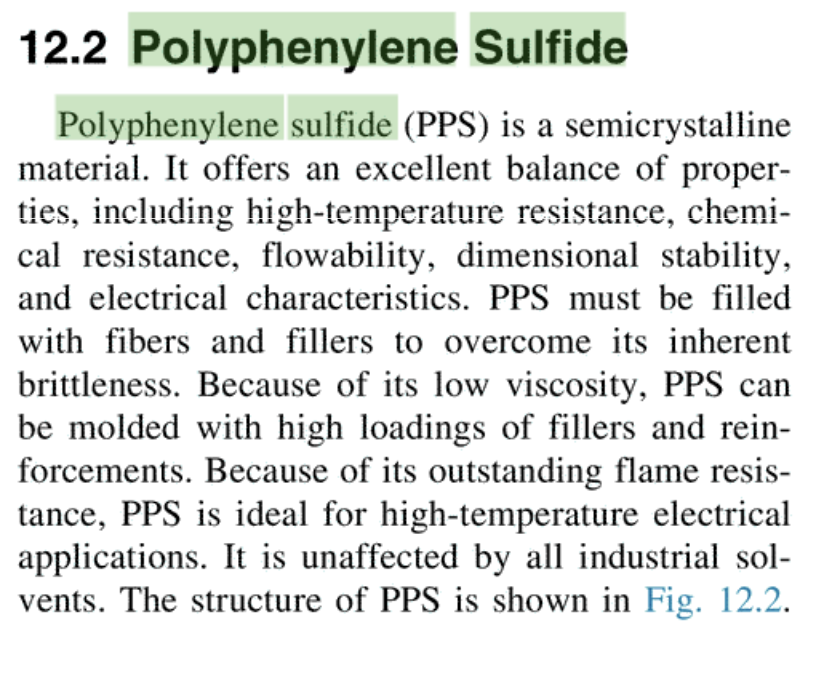</td><td>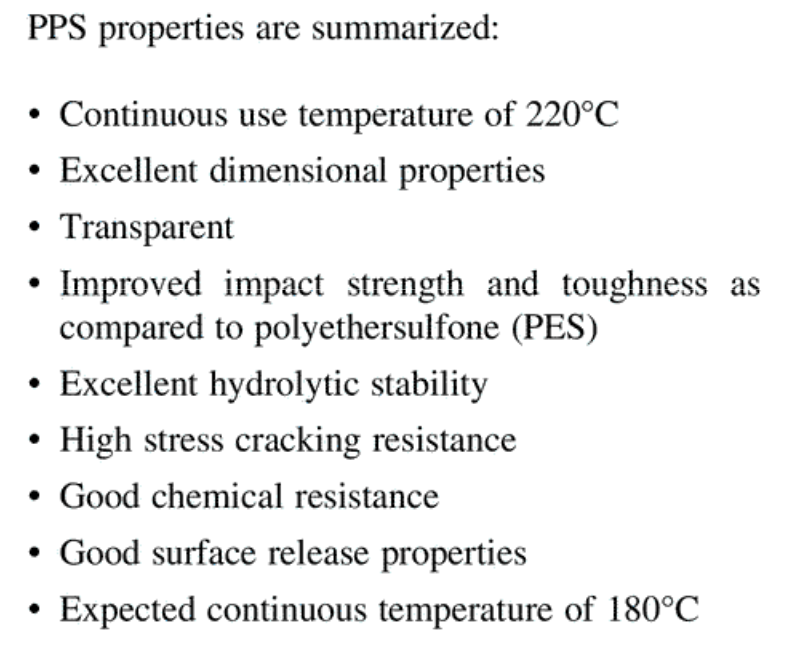</td></tr></table>

- PPS resin is usually processed with both chemical and structural additives. TORAY's Torelina PPS resin includes:

    - Glass fibers
    - MD60 (mineral additives/powders) 
        - Combination of flame retardants, plasticizers, processing agents
    - May include:
        Benzotriazole (UVA)
        Flouropolymers/PTFE (Friction reduction)
        Aluminum Oxide 
        MMT and 4426 (anti-oxidants)


**PPS Polymer Structure and Monomer Structure**

MatWeb TORELINA: http://www.matweb.com/search/datasheet.aspx?matguid=fb9b43b8066443a18b4719e49f15fc38&ckck=1

PPS NIST IR Data: https://srdata.nist.gov/xps/XPSDetailPage.aspx?AllDataNo=44301#Specimen.htm

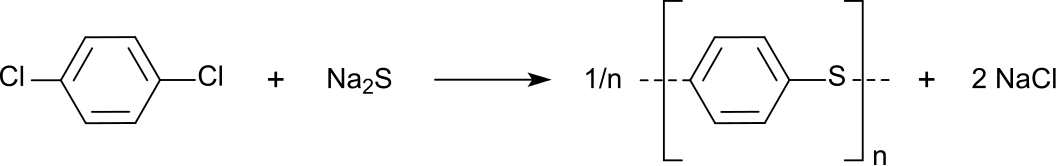

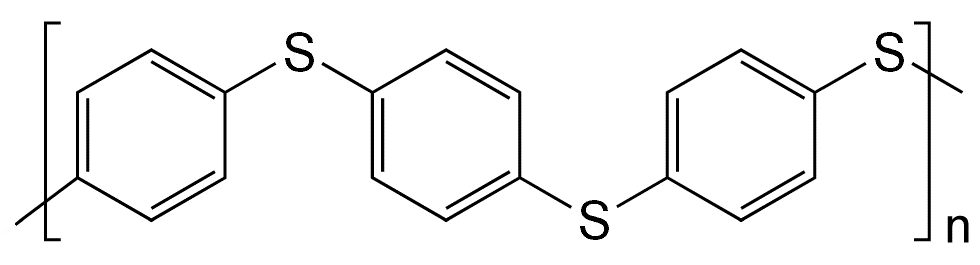

In [120]:
from IPython import display
display.Image("https://upload.wikimedia.org/wikipedia/commons/8/80/PPS_structure.png")

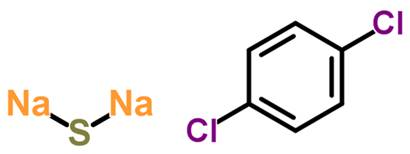

In [119]:
from IPython import display
display.Image("https://polymerdatabase.com/img/poly14-phenylenesulfide.jpg")

# Raman Analysis - Literature

- Characteristic absorption peak of phenyl ring C-C stretching vibration absorption peak of the double bond at 1570cm-1 
- C=CH benzene ring plane bending vibration absorption peak at 1070cm-1
- Characteristic absorption peak of C-S at 740cm-1
- Typical absorption vibration peak of S-S bond at 539 cm-1


Pure PPS (via Advanced Materials Research Vols. 332-334            p. 1047): 
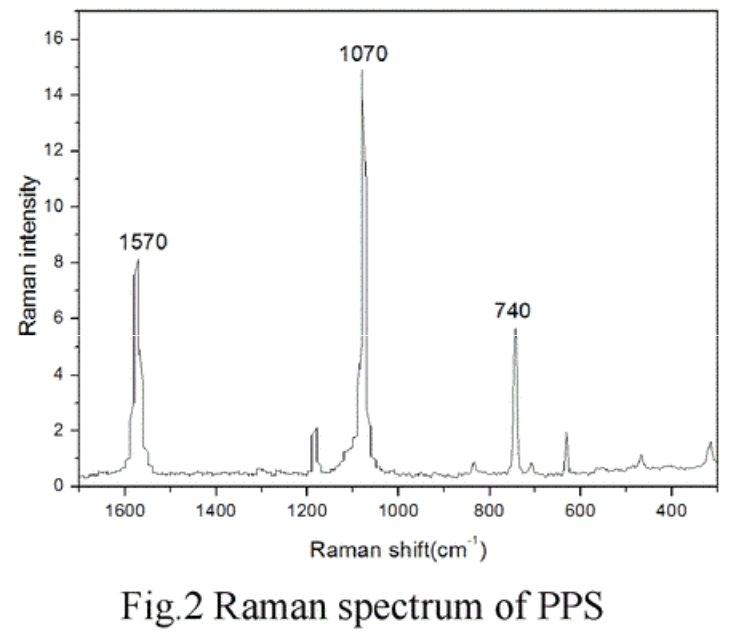


In [22]:
import math
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#%pip install git+https://github.com/raman-noodles/Raman-noodles
#%pip install git+https://github.com/raman-noodles/raman-spectra-decomp-analysis


## 1570 - Phenyl Ring Stretch
## 740 - C-S Bond
## 1070 - C=CH benzene ring plane bending 
## 539 - S-S Bond 

# PPS Acquired Raman Spectra vs. Literature

    - Smoothed via OpenSpecy
## Literature PPS

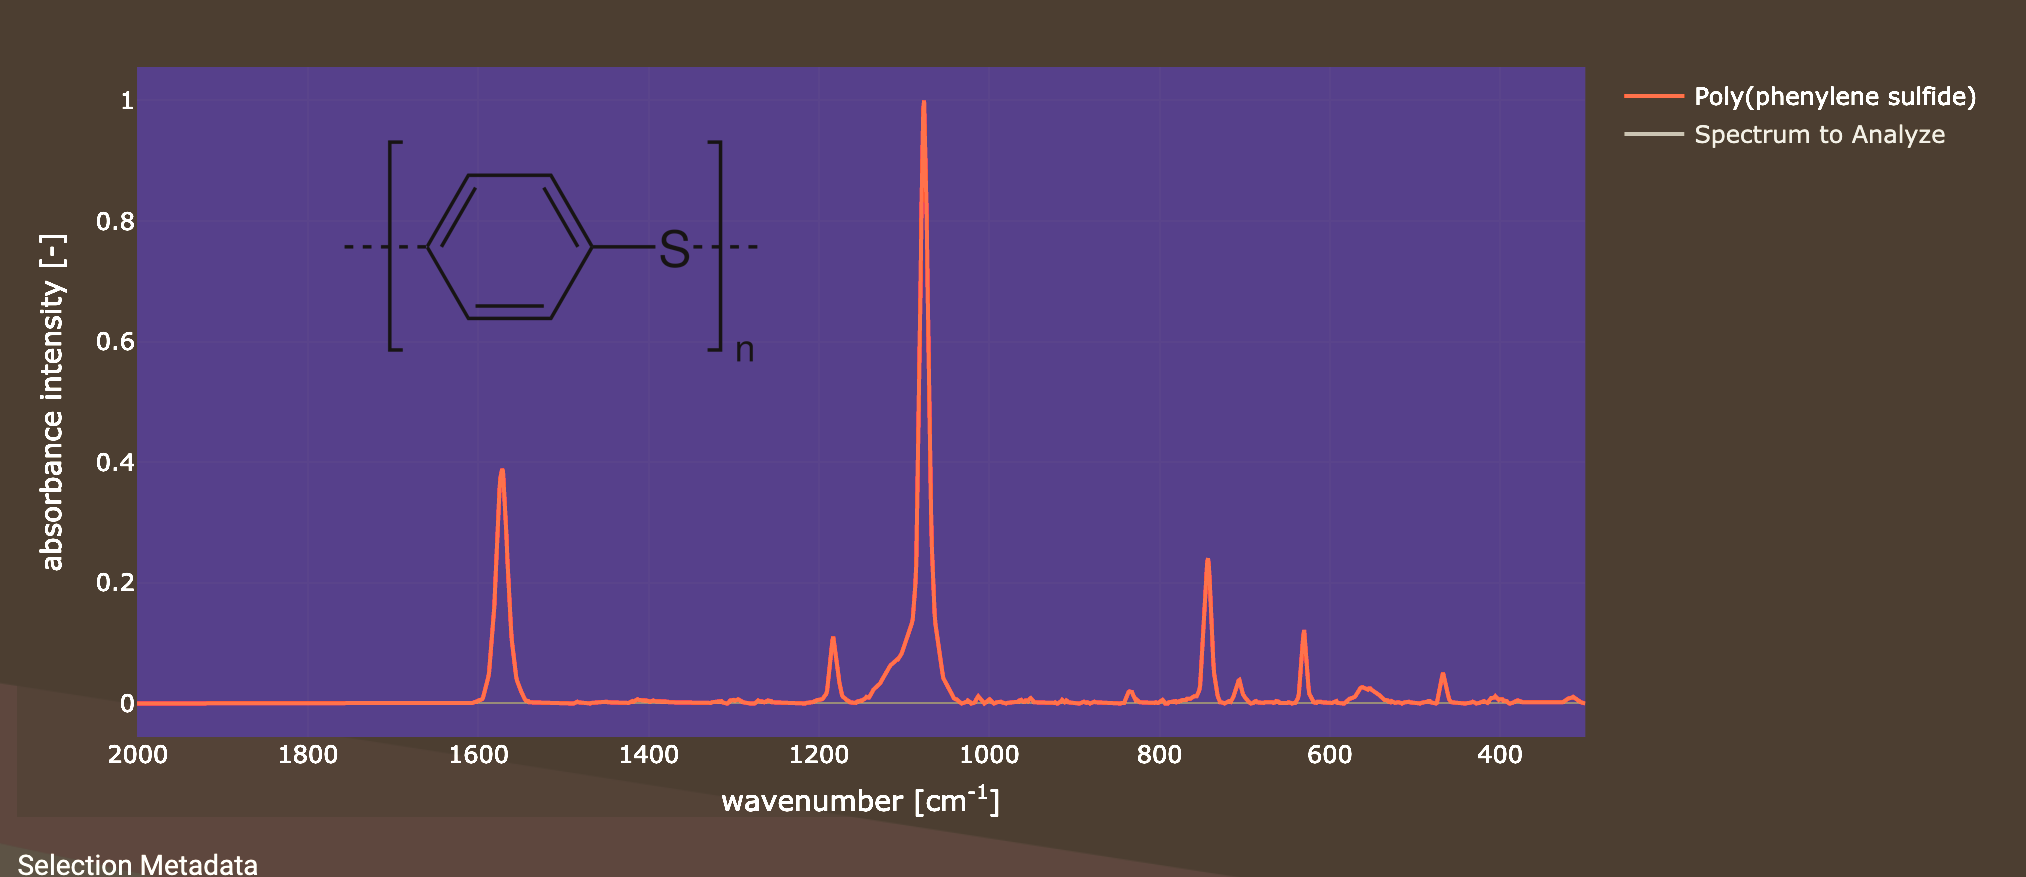


## Acquired Filament
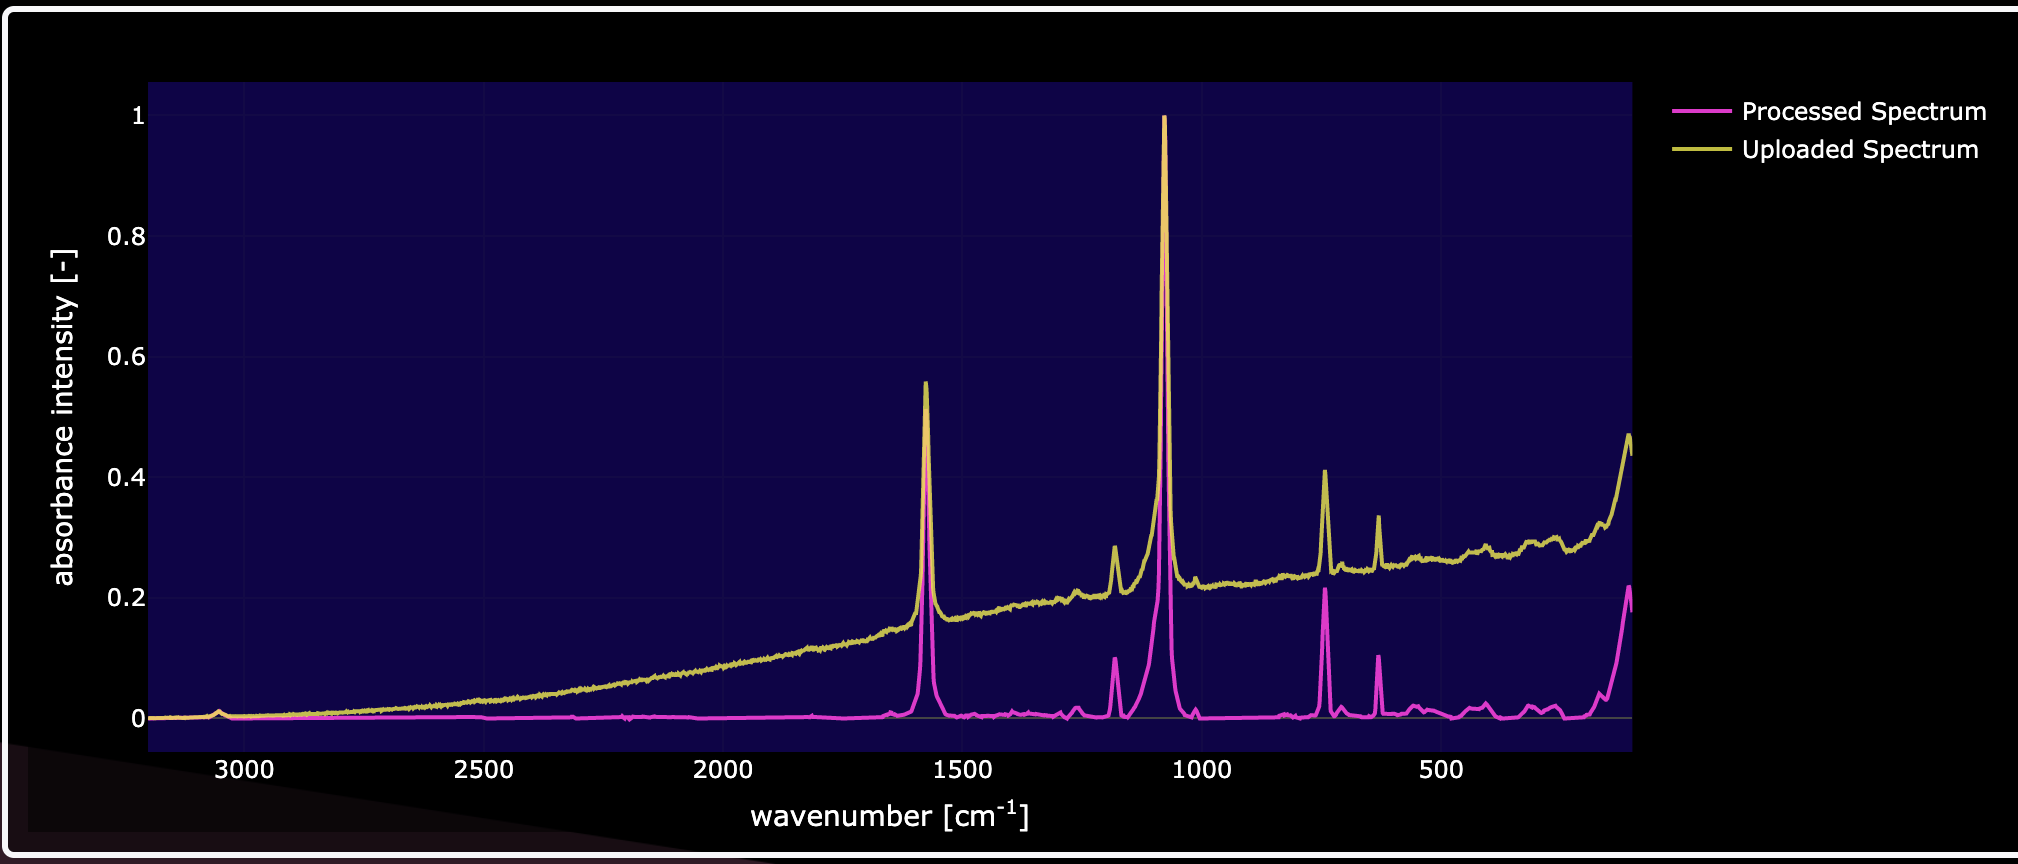

## Acquired Filament vs. Literature
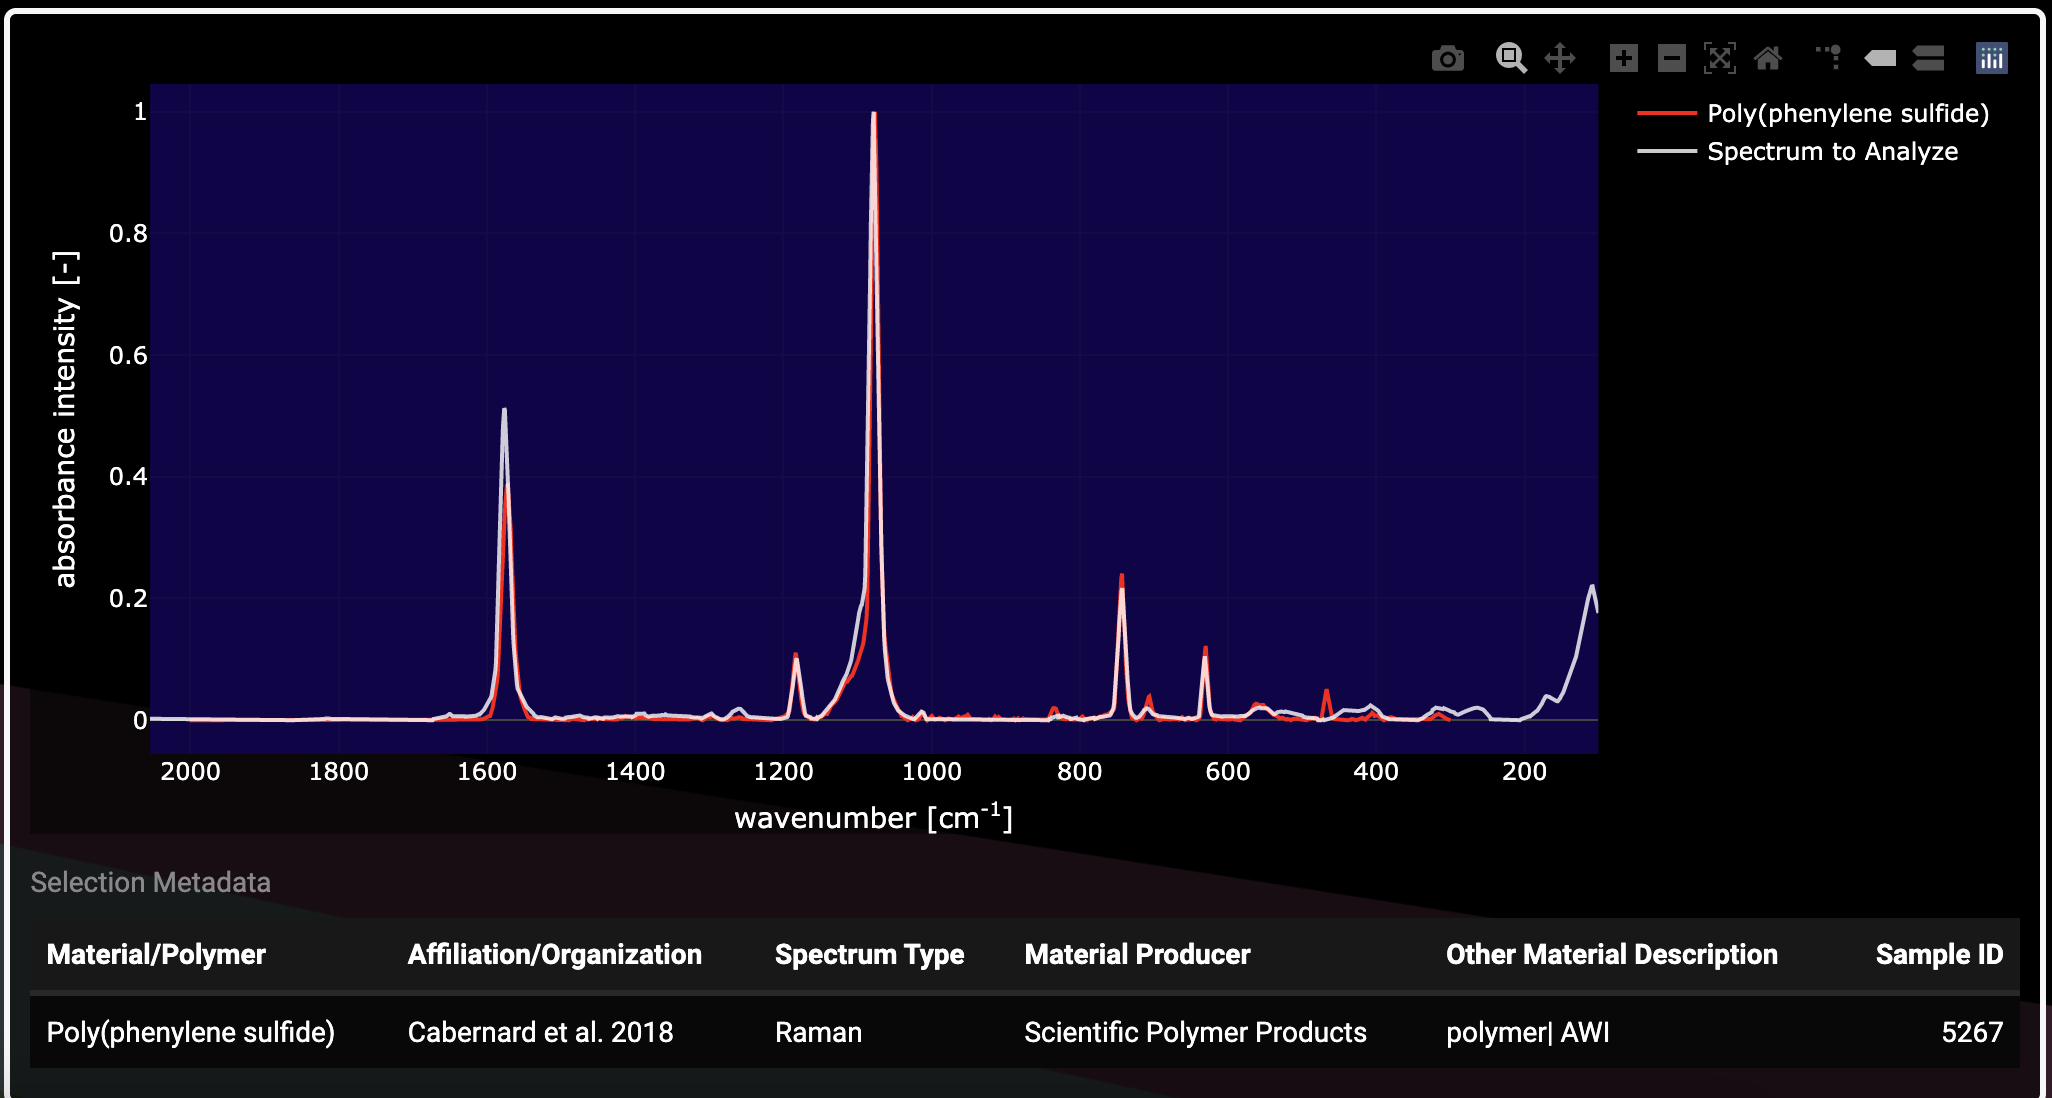
        
## Raw Resin PPS
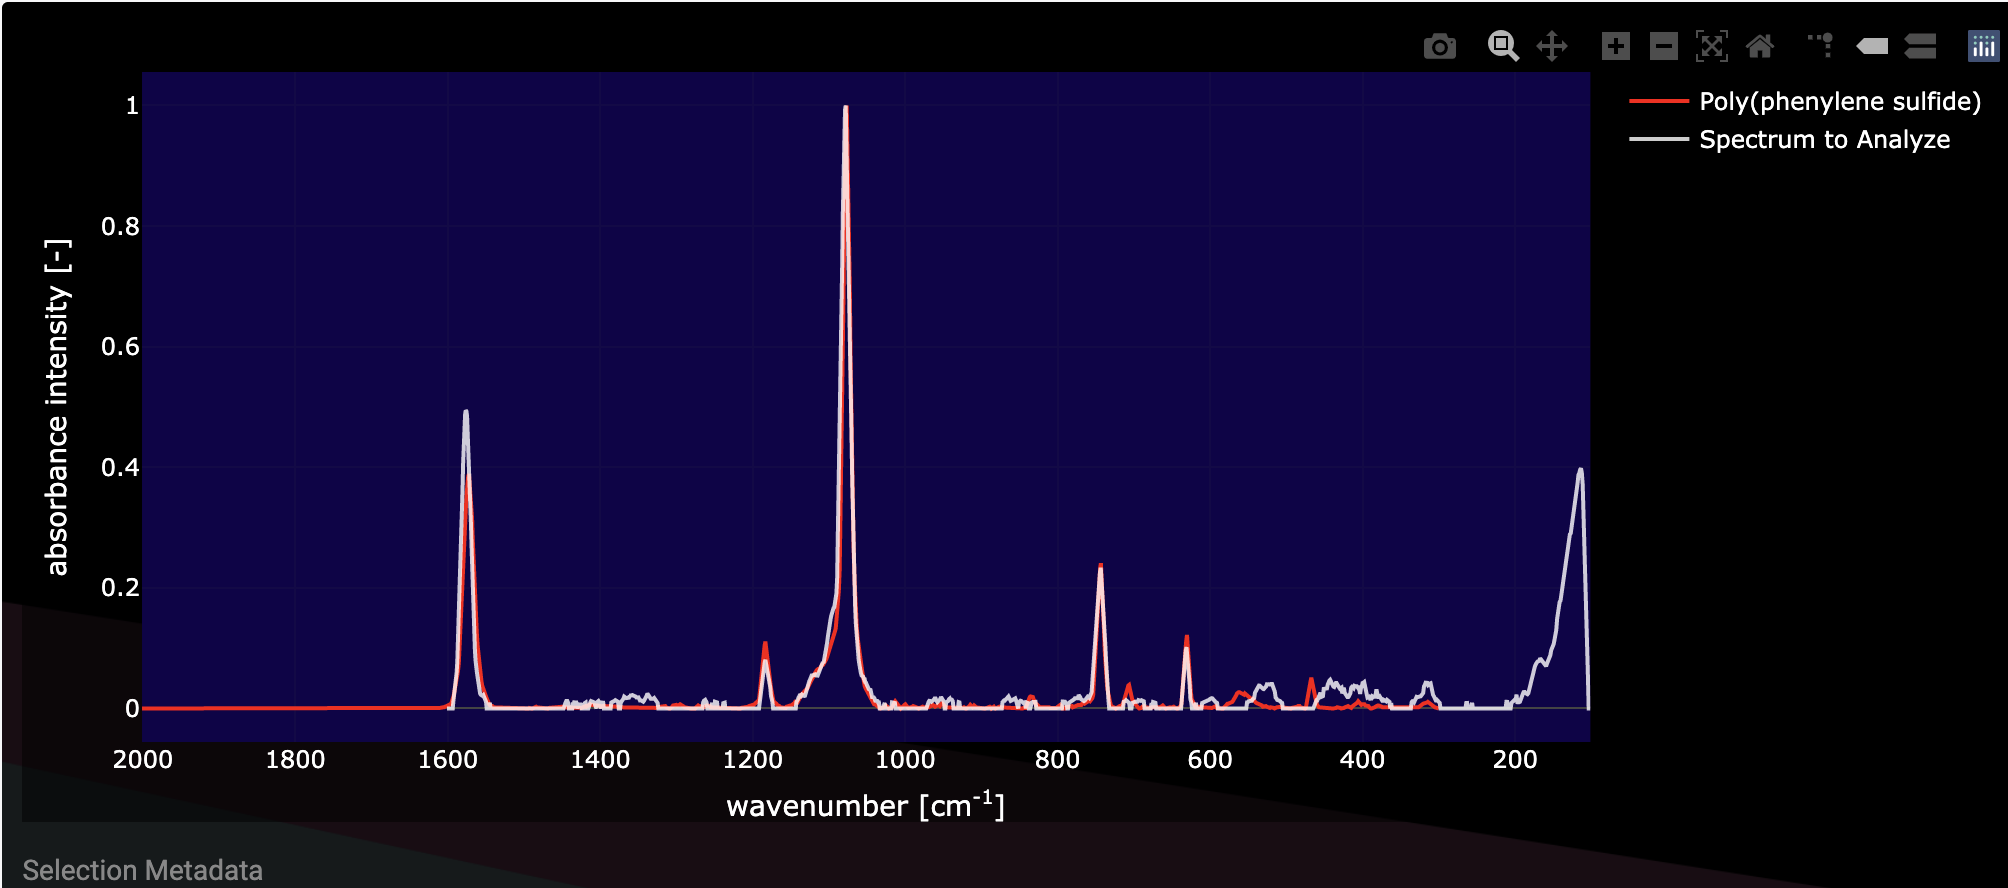

## Acquired Post-Print
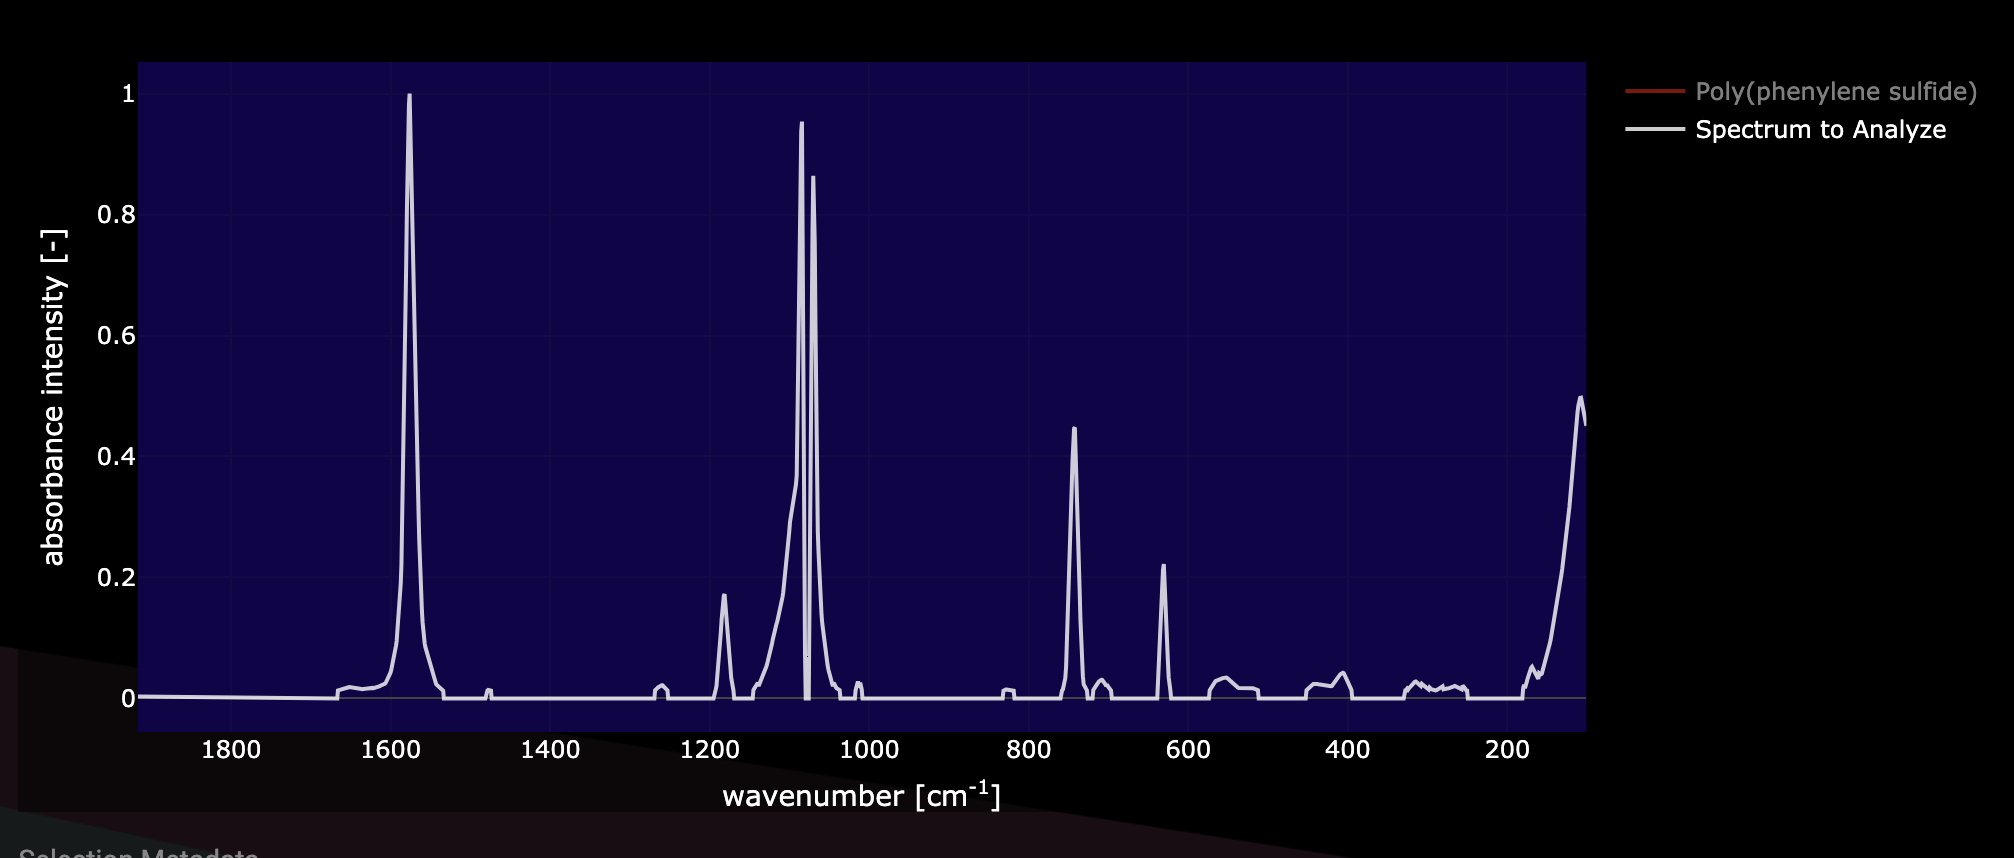

## Acquired Post-Print vs. Literature
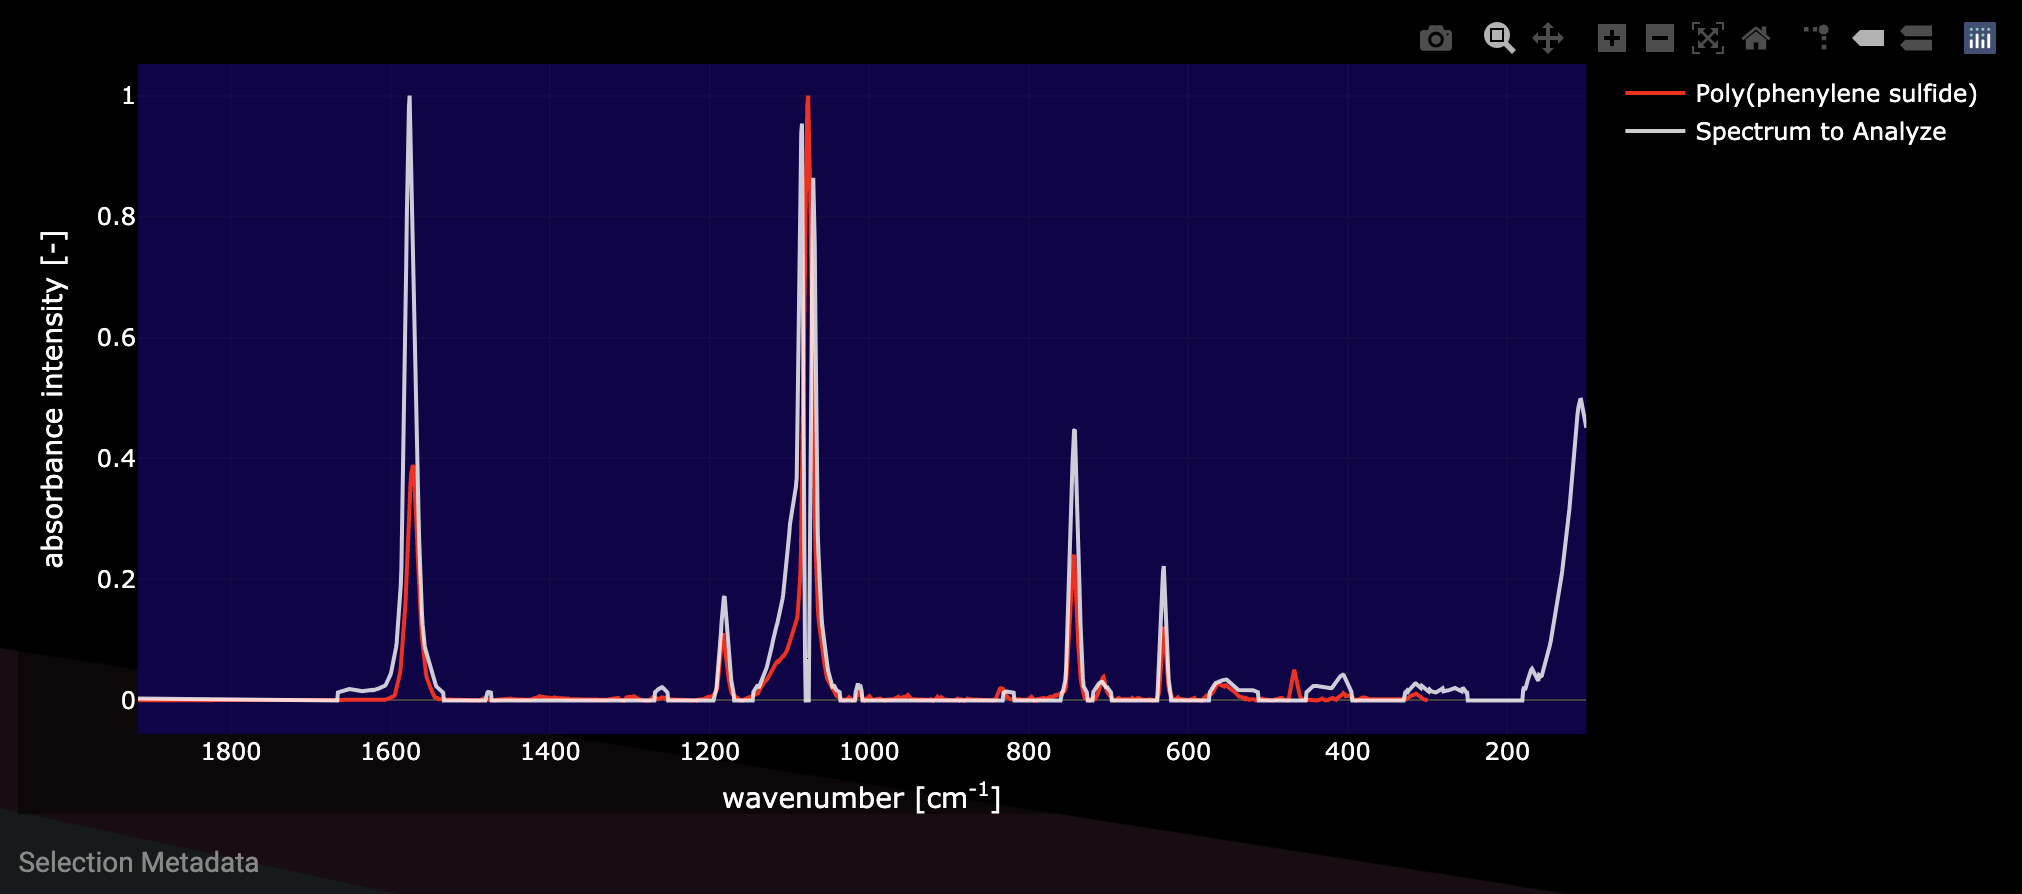


## Differences in Filament Spectra and Post-Print Spectra 
    - Result of user error or true peak changes? 
    - Most predominant is the 1570 peak C-C stretching due to double bond
        - Post-Print spectra is higher than filament spectra at 1570

In [1]:
from ramannoodles import spectrafit
from ramannoodles import shoyu
from ramannoodles import peakidentify
import os
import h5py
import matplotlib.pyplot as plt
from ramandecompy import dataprep
from ramandecompy import datavis

In [2]:
# packages
import pickle
import jcamp
import peakutils
import math
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np  
import os
import glob
from os import chdir
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
from os import listdir
from os.path import isfile, join
import csv

import scipy.stats
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#!git clone https://github.com/raman-noodles/raman-spectra-decomp-analysis

In [3]:
path = '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy'
chdir(path)

# **PPS Data Import**

PPS NIST Chemistry Webbook Spectra:

https://srdata.nist.gov/xps/query_chem_name_detail.aspx?ID_NO=23196

In [6]:
dataprep.new_hdf5('dataprep_calibration')
dataprep.view_hdf5('dataprep_calibration.hdf5')
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                         label='Hydrogen')



**** dataprep_calibration.hdf5 ****
Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to dataprep_calibration.hdf5.


In [7]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber


In [137]:
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx',
                         label='Methane')

Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to dataprep_calibration.hdf5.


In [138]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
Methane
|    Peak_01
|    counts
|    residuals
|    wavenumber


In [76]:
dataprep.new_hdf5('dataprep_experiment')
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_1_SMOOTHED.csv')


Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_1_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.


In [77]:
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_3_SMOOTHED.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_4_SMOOTHED.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_5_SMOOTHED.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_6_SMOOTHED.csv')

Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.
Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_3_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.
Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_4_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.
Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_5_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.
Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_6_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to dataprep_experiment.hdf5.


In [79]:
dataprep.view_hdf5('dataprep_experiment.hdf5')

**** dataprep_experiment.hdf5 ****
1
|    SMOOTHED
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
2
|    SMOOTHED
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber
3
|    SMOOTHED
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    counts
|    |    residuals
|    |    wavenumber
4
|    SMOOTHED
|    | 

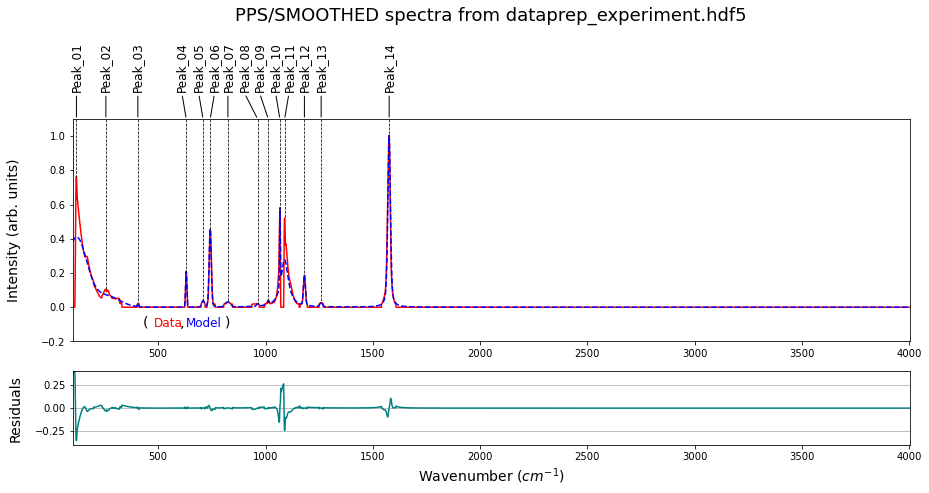

In [39]:
# plot of the original automatic fit from dataprep.add_experiment()
fig, ax1, ax2 = datavis.plot_fit('dataprep_experiment.hdf5', '1/SMOOTHED')


In [80]:
from ramandecompy import datavis
from ramandecompy import dataprep

In [81]:
# plot all spectra saved within the hdf5 file for a specified temperature (390C)
fig, ax = datavis.plot_temp('../ramandecompy/tests/test_files/datavis_example_data.hdf5')

TypeError: plot_temp() missing 1 required positional argument: 'temp'

In [132]:
# the add_list argument consists of a list of integer wavenumbers where the peak should approximately be
# the function allows the fit to adjust the center of the peak +/- 10 cm^-1
add_list = [285, 429, 631, 740, 1070, 1083, 1258, 1570]
# the drop_list argument consists of the string labels of the datasets/labels shown in the hdf5 file and
# the plot produced using dataprep.plot_fit

dataprep.adjust_peaks('dataprep_experiment.hdf5', 'PPS/SMOOTHED', add_list, plot_fits=True)



OSError: Unable to open file (unable to open file: name = 'dataprep_experiment.hdf5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [83]:
#import modules
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis

import chempy
import numpy as np
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt
%matplotlib inline
sp.__version__, chempy.__version__



('1.8', '0.7.6')

In [84]:
# import classes
from chempy import balance_stoichiometry
from pprint import pprint
from chempy import mass_fractions
# Import packages
from chempy import ReactionSystem 
from chempy.kinetics.ode import get_odesys
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# when you add a new hdf5 file you use this function below
dataprep.new_hdf5('peakidentify_calibration_file')

dataprep.add_calibration('peakidentify_calibration_file.hdf5',
                          '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                          label='Hydrogen')
dataprep.add_calibration('peakidentify_calibration_file.hdf5',
                          '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx',
                          label='CarbonMonoxide')
dataprep.add_calibration('peakidentify_calibration_file.hdf5','/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/CO2_100wt%.csv',label='CO2')
dataprep.add_calibration('peakidentify_calibration_file.hdf5','/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/water.xlsx',label='H2O')
dataprep.add_calibration('peakidentify_calibration_file.hdf5','/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/sapphire.xlsx',label='sapphire')
dataprep.add_calibration('peakidentify_calibration_file.hdf5','/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/FormicAcid_3_6percent.xlsx',label='FormicAcid')

#checking the components in the file -- these are the pure component spectra only for calibration use
test_example = h5py.File('peakidentify_calibration_file.hdf5', 'r+')
list(test_example.keys())

Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to peakidentify_calibration_file.hdf5.
Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to peakidentify_calibration_file.hdf5.
Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model.
     Results saved to peakidentify_calibration_file.hdf5.
Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/ramandecompy/ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model.
     Results saved to peakidentify_calibration_file.hdf5.
Data from /Users/carlytravis/opt/anaconda3/lib/python3.8/s

['CO2', 'CarbonMonoxide', 'FormicAcid', 'H2O', 'Hydrogen', 'sapphire']

In [93]:
#checking the values of the files
list(test_example.values())
type(test_example) #checking the type of the files

h5py._hl.files.File

(<Figure size 1080x432 with 2 Axes>,
 <AxesSubplot:ylabel='Intensity (arb. units)'>,
 <AxesSubplot:title={'center':'Hydrogen spectra from peakidentify_calibration_file.hdf5'}, xlabel='Wavenumber ($cm^{-1}$)', ylabel='Residuals'>)

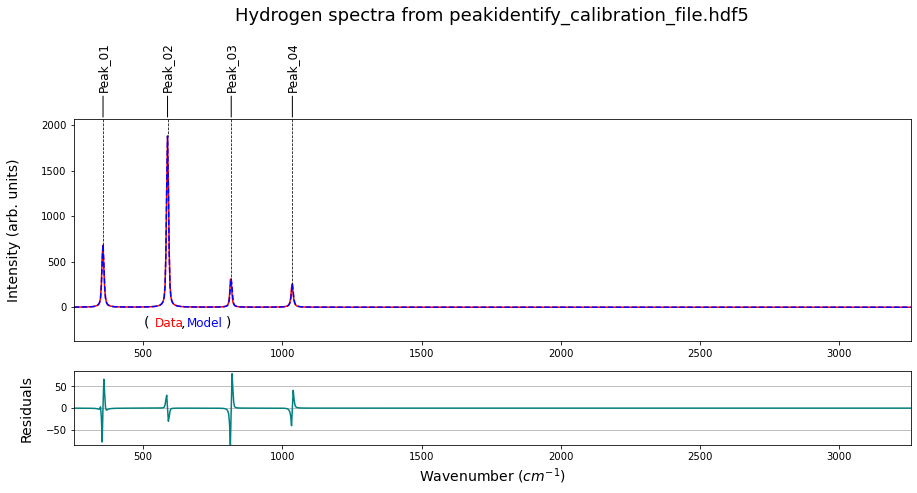

In [94]:
# plotted known spectra with detected peaks
datavis.plot_fit('peakidentify_calibration_file.hdf5', 'Hydrogen') #plotting the hydrogen after going through with dataprep

(<Figure size 1080x432 with 2 Axes>,
 <AxesSubplot:ylabel='Intensity (arb. units)'>,
 <AxesSubplot:title={'center':'CarbonMonoxide spectra from peakidentify_calibration_file.hdf5'}, xlabel='Wavenumber ($cm^{-1}$)', ylabel='Residuals'>)

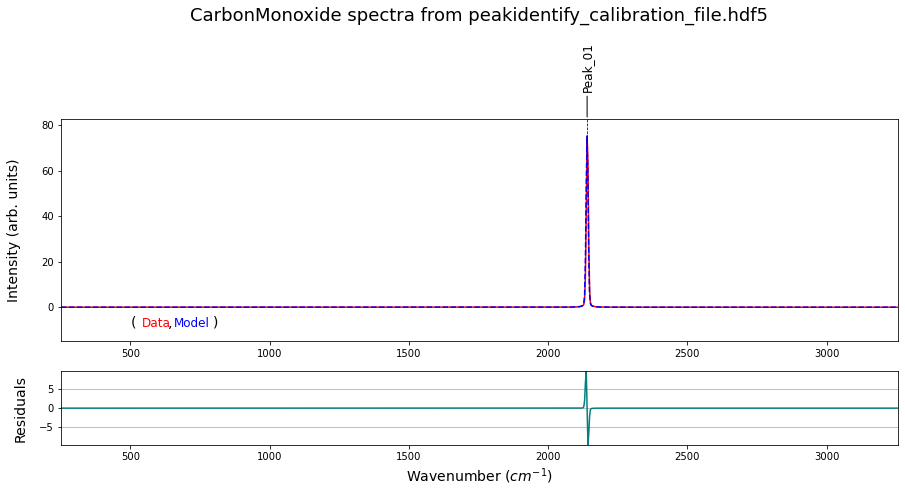

In [95]:
datavis.plot_fit('peakidentify_calibration_file.hdf5', 'CarbonMonoxide')

(<Figure size 1080x432 with 2 Axes>,
 <AxesSubplot:ylabel='Intensity (arb. units)'>,
 <AxesSubplot:title={'center':'H2O spectra from peakidentify_calibration_file.hdf5'}, xlabel='Wavenumber ($cm^{-1}$)', ylabel='Residuals'>)

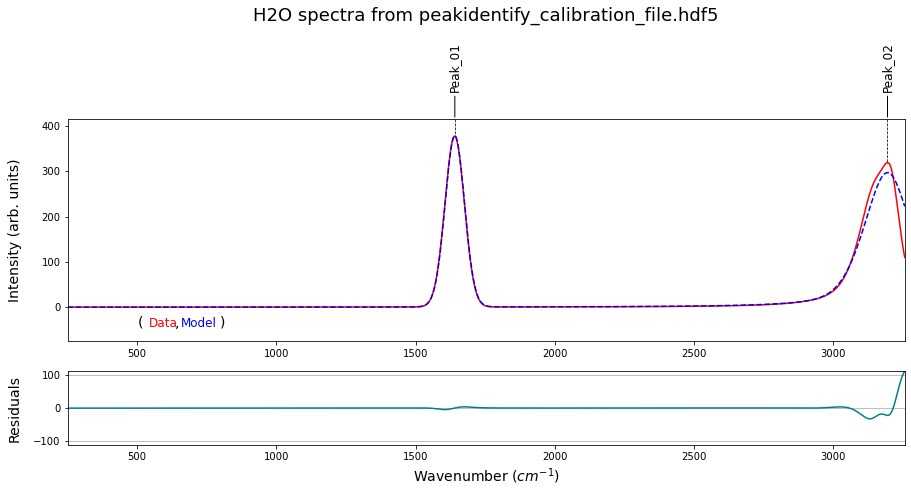

In [96]:
datavis.plot_fit('peakidentify_calibration_file.hdf5', 'H2O')

(<Figure size 1080x432 with 2 Axes>,
 <AxesSubplot:ylabel='Intensity (arb. units)'>,
 <AxesSubplot:title={'center':'CO2 spectra from peakidentify_calibration_file.hdf5'}, xlabel='Wavenumber ($cm^{-1}$)', ylabel='Residuals'>)

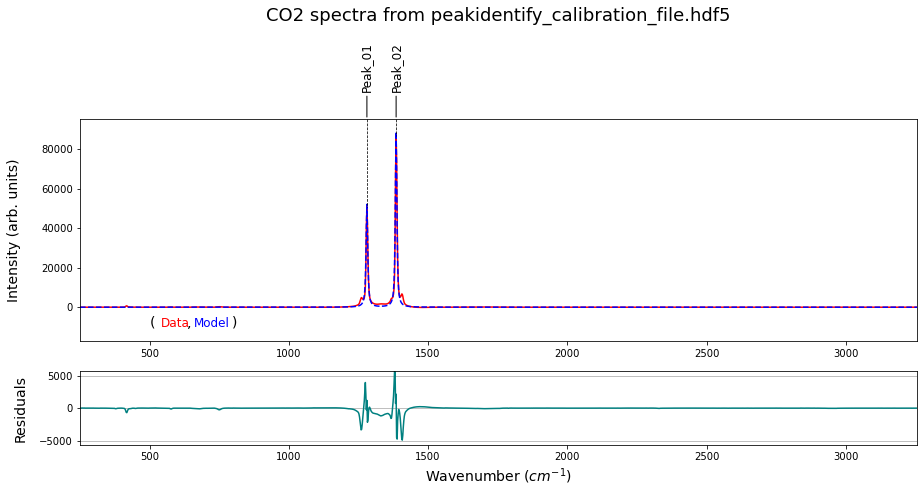

In [98]:
datavis.plot_fit('peakidentify_calibration_file.hdf5', 'CO2')

In [99]:
dataprep.new_hdf5('peakidentify_experiment_file')
dataprep.add_experiment('peakidentify_experiment_file.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv') 

Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to peakidentify_experiment_file.hdf5.


In [103]:
dataprep.new_hdf5('peakidentify_label_test')
dataprep.add_experiment('peakidentify_label_test.hdf5', '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv')

Data from /Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS/UNAGED_PPS_2_SMOOTHED.csv fit with compound pseudo-Voigt model.
     Results saved to peakidentify_label_test.hdf5.


In [100]:
dataprep.view_hdf5('peakidentify_calibration_file.hdf5')

**** peakidentify_calibration_file.hdf5 ****
CO2
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
CarbonMonoxide
|    Peak_01
|    counts
|    residuals
|    wavenumber
FormicAcid
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    Peak_05
|    Peak_06
|    counts
|    residuals
|    wavenumber
H2O
|    Peak_01
|    Peak_02
|    counts
|    residuals
|    wavenumber
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber
sapphire
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    residuals
|    wavenumber


In [104]:
dataprep.view_hdf5('peakidentify_label_test.hdf5')

**** peakidentify_label_test.hdf5 ****
2
|    SMOOTHED
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber


The peaks that we found for CO2 are: 
1280.4
1385.3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for CarbonMonoxide are: 
2139.9096496496495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for FormicAcid are: 
707.31
1055.9
1219.5
1400.1
1716.7
2940.6
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
The peaks that we found for H2O are: 
1640.6
3194.4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for Hydrogen are: 
355.6504104104104
587.3333133133133
816.0073473473473
1035.6547747747748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The peaks that we found for sapphire are: 
378.71
418.14
575.97
751.21
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


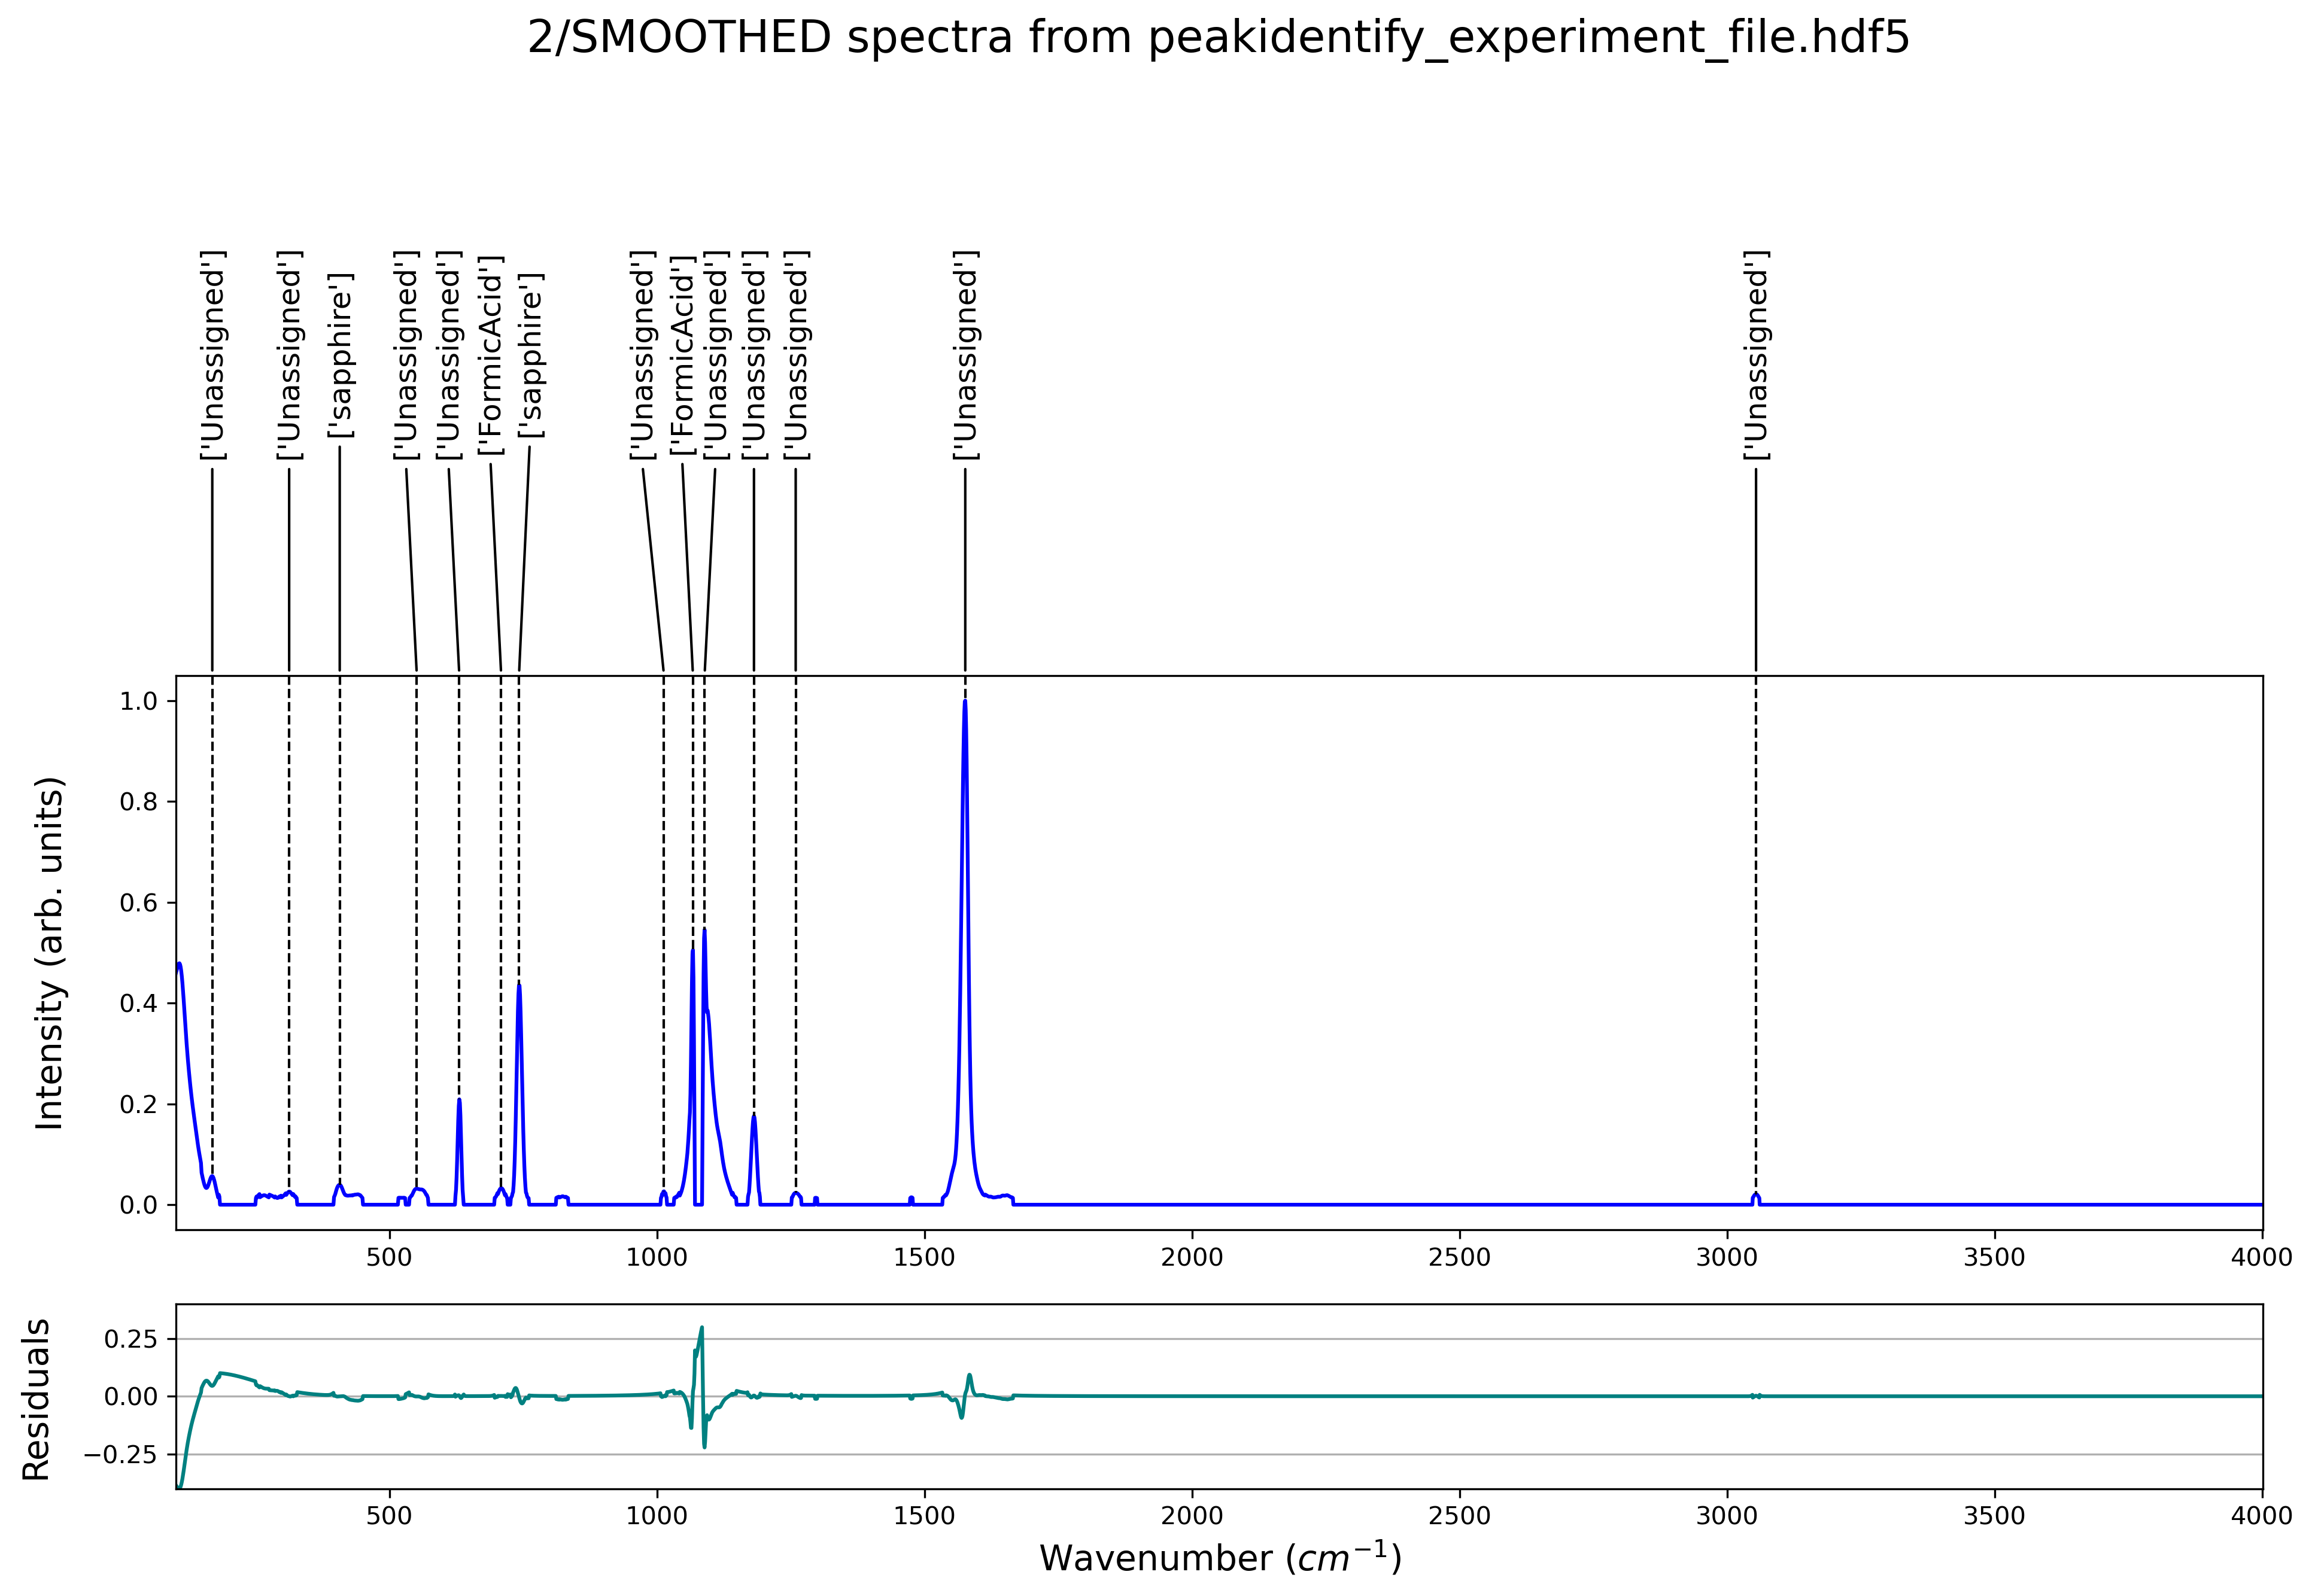

{'CO2': 0.0, 'CarbonMonoxide': 0.0, 'FormicAcid': 33.33333333333333, 'H2O': 0.0, 'Hydrogen': 0.0, 'sapphire': 50.0}


In [106]:
hdf5_calfilename = 'peakidentify_calibration_file.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'peakidentify_experiment_file.hdf5'
expkey ='2/SMOOTHED'
external_peak_labels = []
df = peakidentify.peak_assignment(hdf5_expfilename, expkey, hdf5_calfilename, external_peak_labels, 20, externallabelinput = False)
# plt.savefig('peakidentify_formicAcid_300C/25s_spectra', dpi=300, bbox_inches='tight')

In [107]:
df

,0,1,2,3,4,5,6,7
0,0.0,100.0,169.073,21.654416,200.0,0.101715,17.079522,['Unassigned']
1,0.0,1.215856,312.718,0.004395,2.431712,0.002608,0.004395,['Unassigned']
2,0.223354,8.992458,407.235,0.760647,17.984916,0.036872,0.758925,['sapphire']
3,0.0,15.519398,551.32,1.013988,31.038796,0.03069,1.013988,['Unassigned']
4,0.0,3.70434,630.708,1.664222,7.408679,0.211027,1.664221,['Unassigned']
5,0.0,7.811579,708.977,0.544876,15.623158,0.032764,0.544876,['FormicAcid']
6,0.101225,5.84681,742.183,5.544722,11.69362,0.430915,5.542772,['sapphire']
7,0.000004,3.07151,1013.21,0.075275,6.14302,0.011512,0.075274,['Unassigned']
8,0.0,2.16298,1067.32,1.875276,4.325961,0.40724,1.875363,['FormicAcid']
9,1.0,16.642177,1089.0,16.903914,33.284353,0.323316,16.782546,['Unassigned']


**** peakidentify_experiment_file.hdf5 ****
2
|    SMOOTHED
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    counts
|    |    residuals
|    |    wavenumber


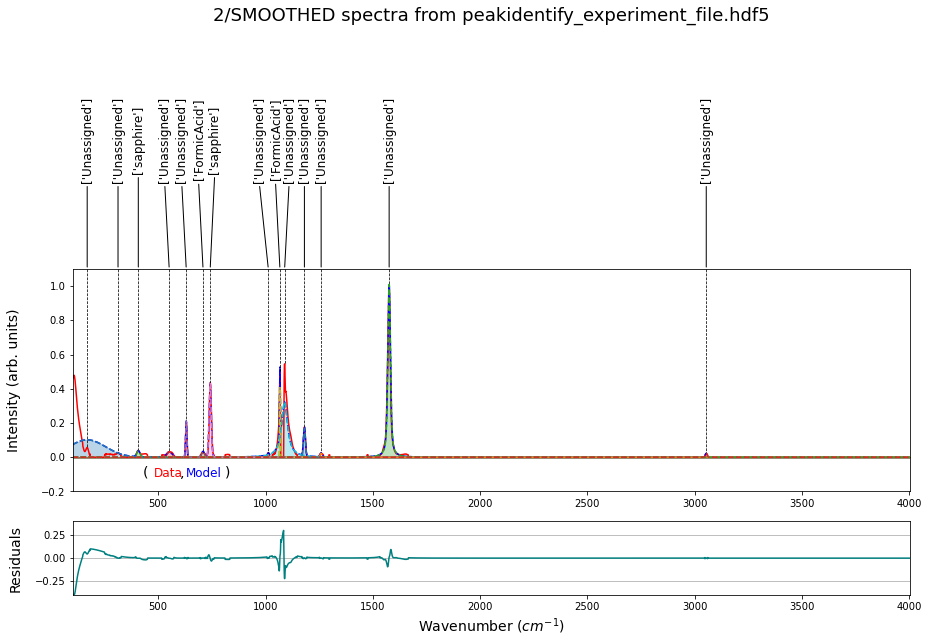

In [109]:
expkey = '2/SMOOTHED'
dataprep.view_hdf5('peakidentify_experiment_file.hdf5')
fig, ax1, ax2 = datavis.plot_fit(hdf5_expfilename, expkey)
datavis.plot_components(ax1, hdf5_expfilename, expkey, [1,2,3,4,5,6,7,8,9,10,11,12,13,14])

In [ ]:
#Call the function, which will return text detailing what files you are downloading, and the directory 
#that they are being downloaded into. 
shoyu.initialize_standard_library()
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

In [ ]:
#Call the function, which will return text detailing what files you are downloading, and the directory 
#that they are being downloaded into. 
shoyu.initialize_standard_library()
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

In [115]:
# Reaction System from string 
# The rate constants below are arbitrary
rsys = ReactionSystem.from_string("""
ClC6H4Cl + Na2S -> C6H4S + 2 NaCl; 42

""")  # "[H2O]" = 1.0 (actually 55.4 at RT)
reaction, product = balance_stoichiometry({'ClC6H4Cl', 'Na2S'},{'C6H4S', 'NaCl'})
for fractions in map(mass_fractions, [reaction, product]):
    pprint({k: '{0:.3g} wt%'.format(v*100) for k, v in fractions.items()})
    # .4g is for the number of sig figs 
rsys

{'ClC6H4Cl': '65.3 wt%', 'Na2S': '34.7 wt%'}
{'C6H4S': '48.1 wt%', 'NaCl': '51.9 wt%'}


In [117]:
#1,4-Dichlorobenzene
shoyu.more_please("106-46-7")
##https://webbook.nist.gov/cgi/cbook.cgi?ID=106-46-7&Units=SI

#styrene, oligomers
shoyu.more_please("9003-53-6")
#Disodium sulfide
#shoyu.more_please("1313-82-2")

## 

file already in raman_spectra folder
BENZENE, 1,4-DICHLORO- loaded into the dictionary - shoyu_data_dict.p
Bad Request: CAS # not found. Please verify
             with NIST Chemistry WebBook.


FileNotFoundError: [Errno 2] No such file or directory: '../raman_spectra/9003536_NIST_IR.jdx'

In [ ]:
shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
sorted(shoyu_data_dict.keys())

In [ ]:
spectrum = np.genfromtxt("/content/unaged_PPS.txt")
plt.plot(X1,Y1,label="GCVSmoothedNSpline")

In [ ]:
df1 = pd.read_excel('RAMAN_PPS_UNAGED.xlsx')
df1
X1 = np.array(np.absolute(df1['PPS_1']))
Y1 = np.array(df1['Unnamed: 1'])

X2 = df1['PPS_2']
Y2 = df1['Unnamed: 3']

X3 = df1['PPS_3']
Y3 = df1['Unnamed: 5']

X4 = df1['PPS_4']
Y4 = df1['Unnamed: 7']

X5 = df1['PPS_4_2']
Y5 = df1['Unnamed: 9']

X6 = df1['PPS_4_3']
Y6 = df1['Unnamed: 11']




In [ ]:
Obs_corr = np.ones(spectrum.shape)
print(Obs_corr.shape)
x = np.arange(0,10570,1.0)
ROI = np.array([[387.,578.],[2000.,3000.], [3500., 4000.]])
print(ROI)
ycalc1, base1 = rp.baseline(X1,Y1,ROI,'poly',polynomial_order=1)
Obs_corr = ycalc1.reshape(1,-1)
plt.plot(X1,Y1)
plt.plot(X1,base1)


In [ ]:
plt.plot(X1, Obs_corr.T)

In [ ]:
plt.ylabel('Intensity (cm^-1)')
plt.xlabel('Wavenumber')
import seaborn as sns
sns.lineplot(X1, Y1, data=df1)

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor= (1,1))



plt.show()


In [5]:
os.remove('dataprep_calibration.hdf5')
os.remove('dataprep_experiment.hdf5')
os.remove('peakidentify_experiment_file.hdf5')
os.remove('peakidentify_calibration_file.hdf5')

In [90]:
os.remove('peakidentify_calibration_file.hdf5')

In [131]:
path = '/Users/carlytravis/Documents/Research/PPS Data/RAMAN/Re__Raman_data_for_PPS'
chdir(path)
df3 = pd.read_csv('PPs front tensile bar.txt', delimiter= '\s+')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte